In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
class kernelPerceptron:
    """
    Esta clase definie un Kernel Perceptrón con la posiblidad de elegir distintos tipos
    de kernel para ejecutar el algoritmo
    """
    
    def __init__(self):
        self.alphas = 0
        self.Xs = 0
        self.Ys = 0
        self.n = 0
        self.kernel = lambda x1,x2 : (1 + x1@x2)**2
        
    def set_kernel(self,kernel_name,Q=2):
        """
        Esta función permite cambiar el kernel utilzado para el algoritmo,
        por defecto el metodo utilza un kernel polinómico de grado 2
        
        Parametros:
            kernel_name: nombre del kernel que se desea utilizar
        """
        
        if kernel_name=='polinomico':
            self.kernel = lambda x1,x2 : (1 + x1@x2)**Q
        elif kernel_name=='base_radial':
            self.kernel = lambda x1,x2 : np.exp((-1/2)*np.norm(x1-x2)**2)
        else:
             raise ValueError("El kernel indicado no esta disponible")
            
            
        
    def KP(self,X,Y):
        """
        Esta función implimenta el algoritmo del Kernel perceptrón 
        
        Parametros:
            X: El vector de caracteristicas para el entrenamiento;
            Y: Las etiquetas del vector X;
        """
        self.n = X.shape[0]
        self.Xs = X
        self.Ys = Y
        self.alphas = np.zeros(self.n)
        
        for i in range(self.n):
            suma = 0
            for j in range(self.n):
                suma += self.alphas[j]*Y[j]*self.kernel(X[j],X[i])
            
            if y[i]*suma <= 0 :
                self.alphas[i] += 1
    
    def sgn(self,x):
        resp = 1
        if x <= 0:
            resp = 0
        return resp
    
    def decision_function(self,x):
        """
        Esta función clasifica el punto x utilzando las alphas obtenidas en el entrenamiento
        
        Parametros:
            x: El punto a clasificar
        """
        suma = 0
        
        for i in range(self.n):
            suma += self.alphas[i]*self.Ys[i]*self.kernel(self.Xs[i],x)
            
        return self.sgn(suma)
    
    def decision_function_vectorize(self,X):
        """
        Esta función clasifica los puntos en X utilzando las alphas obtenidas en el entrenamiento

        Parametros:
            x: El punto a clasificar
        """
        m = X.shape[0]
        y_hat = np.zeros(m)
        
        for i in range(m):
            y_hat[i] = self.decision_function(X[i])

        return y_hat
        

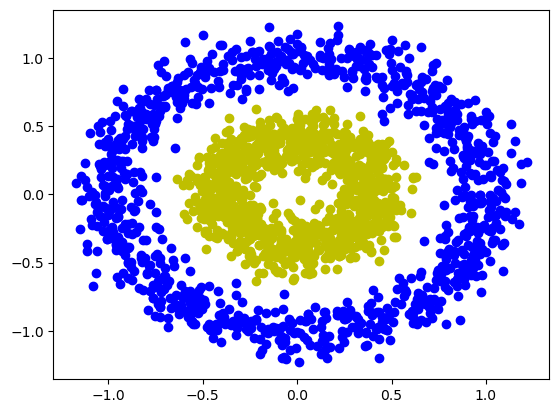

In [74]:
X, y = make_circles(2000, noise = .1, random_state = 123, factor = .4)
#plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(X[y==0,0], X[y==0,1], "bo")
plt.plot(X[y==1,0], X[y==1,1], "yo")

In [75]:
model = kernelPerceptron()
model.KP(X,y)

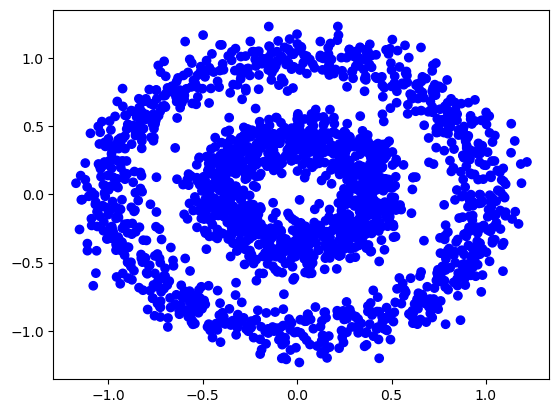

In [76]:
import matplotlib.colors as mcolors

y_hat = model.decision_function_vectorize(X)
plt.scatter(X[:,0], X[:,1], c = y_hat, cmap=mcolors.ListedColormap(['b', 'y']))
#plt.plot(X_new[y_hat==0,0], X_new[y_hat==0,1], "bo")
#plt.plot(X_new[y_hat==1,0], X_new[y_hat==1,1], "yo")

In [5]:
def plot_contour(X1_train, X2_train, clf):
    plt.plot(X1_train[:,0], X1_train[:,1], "bo")
    plt.plot(X2_train[:,0], X2_train[:,1], "yo")

    X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,50), np.linspace(-1.3,1.3,50))
    X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
    Z = clf.decision_function(np.c_[(X,X[:,0]**2,X[:,1]**2)]).reshape(X1.shape)

    plt.contour(X1, X2, Z, [0], colors='r', linewidths=3)

    plt.show()

AttributeError: 'kernelPerceptron' object has no attribute 'decision_function'

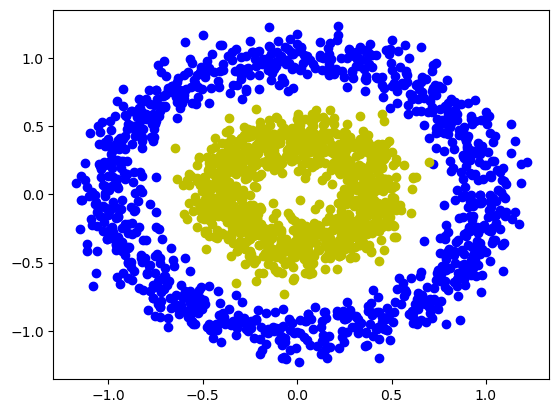

In [45]:
plot_contour(X[y_hat==0], X[y_hat==1],model)

In [ ]:
X1, X2 = np.meshgrid(np.linspace(-1.3,1.3,50), np.linspace(-1.3,1.3,50))
X2

In [ ]:
X1

In [ ]:
np.ravel(X1)[:52]

In [ ]:
[x for x in zip(np.ravel(X1))] 

In [ ]:
X_test = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
X_test

In [64]:
X[0]

array([-0.17513797,  0.42306479])

In [54]:
X

array([[-0.17513797,  0.42306479],
       [-0.17557612,  0.37497479],
       [ 0.49993286,  0.91097893],
       ...,
       [-0.15397512,  0.30165901],
       [-0.30247295,  0.36999735],
       [-0.50393071,  0.02569635]])

In [24]:
X[0].dot(X[1])

0.18938867458369052

In [77]:
y_hat

array([1., 1., 1., ..., 1., 1., 1.])